In [13]:
# importing all the essential libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import multiprocessing as mp
import math
from sklearn.preprocessing import MinMaxScaler

In [14]:
# reading the final dataset
data=pd.read_csv('merged.csv',low_memory=False)

In [15]:
# data

In [16]:
# data.dtypes

In [17]:
# columns that are needed to be converted


column_type=['Pressure_dbar',
             'Temperature_Celcius',
             'salinity_pss',
             'Sigma_theta_kg_m_pow_minus_3',
             'depth_m',
             'oxygen_mu_molkg_pow_minus_1',
             'oxygen_saturation_percentage',
             'nitrate_mu_mol_kg_pow_minus_1',
             'chl_a_mg_m_pow_minus_3',
             'b_bp700_m_pow_minus_1',
             'POC_milli_mol_m_pow_minus_3',
             'pH_insitu_total','pH_25C_total',
             'TALK_micro_mol_kg_pow_minus_1',
             'DIC_micro_mol_kg_pow_minus_1',
             'pCO2_micro_atm','b_bp532_m_pow_minus_1',
             'CDOM_ppb']

In [18]:
# action for column conversion from object to float

for col in column_type:
    data[col]=data[col].astype(float)

In [19]:
# data.dtypes

In [20]:
# finding null values in each columns

# data.isna().sum()

In [21]:
# droppoing mbariID column as it contains only 1 value

data.drop(['mbariID'],axis=1,inplace=True)

In [22]:
# data.region.unique()

In [23]:
# region column has been done label encoding

# might change to another feature encoding method if required
# label_encoder = preprocessing.LabelEncoder()
# data['region']= label_encoder.fit_transform(data['region'])
  

In [24]:
# only has one type of value, need to be dropped

# data.Type.unique()

In [25]:
data.drop(['Type',
           'pressure_QF',
           'temperature_QF',
           'b_bp532_m_pow_minus_1',
           'b_bp532_QF',
          'oxygen_saturation_percentage'],axis=1,inplace=True)

In [26]:
## time need to be converted


# data.time.unique()

In [27]:
# finding the min and max value for all columns

# for col in data.columns:
#     print("min value for ",col," column: ",data[col].unique().min())
#     print("max value for ",col," column: ",data[col].unique().max())

In [28]:
#skewed column
## (-10000000000.0, 109804)


# l=data["chl_a_mg_m_pow_minus_3"].value_counts()
# l=l.sort_index()
# print("length is: ",len(l))
# for i in l.iteritems():
#     print(i)

In [29]:
## (-10000000000.0, 109804)


# l=data["b_bp700_m_pow_minus_1"].value_counts()
# l=l.sort_index()
# print("length is: ",len(l))
# for i in l.iteritems():
#     print(i)

In [30]:
## (-10000000000.0, 109804)


# l=data["POC_milli_mol_m_pow_minus_3"].value_counts()
# l=l.sort_index()
# print("length is: ",len(l))
# for i in l.iteritems():
#     print(i)

In [31]:
## why does it have negative valuess?????
## (-10000000000.0, 101285)




# l=data["pH_insitu_total"].value_counts()
# l=l.sort_index()
# print("length is: ",len(l))
# for i in l.iteritems():
#     print(i)

In [32]:
## (-10000000000.0, 125547)


# l=data["pH_25C_total"].value_counts()
# l=l.sort_index()
# print("length is: ",len(l))
# for i in l.iteritems():
#     print(i)

In [33]:
## (-10000000000.0, 33343)



# l=data["TALK_micro_mol_kg_pow_minus_1"].value_counts()
# l=l.sort_index()
# print("length is: ",len(l))
# for i in l.iteritems():
#     print(i)

In [34]:
# (-10000000000.0, 125547)


# l=data["DIC_micro_mol_kg_pow_minus_1"].value_counts()
# l=l.sort_index()
# print("length is: ",len(l))
# for i in l.iteritems():
#     print(i)

In [35]:
## so many (-10000000000.0, 160412), thinking about droping this column??


# l=data["pCO2_micro_atm"].value_counts()
# l=l.sort_index()
# print("length is: ",len(l))
# for i in l.iteritems():
#     print(i)

In [36]:
## so many (-10000000000.0, 129650), thinking about dropping it





# l=data["CDOM_ppb"].value_counts()
# l=l.sort_index()
# print("length is: ",len(l))
# for i in l.iteritems():
#     print(i)

In [37]:
# l=data["oxygen_mu_molkg_pow_minus_1"].value_counts()
# l=l.sort_index()
# print("length is: ",len(l))
# for i in l.iteritems():
#     print(i)


In [38]:
# l=data["nitrate_mu_mol_kg_pow_minus_1"].value_counts()
# l=l.sort_index()
# print("length is: ",len(l))
# for i in l.iteritems():
#     print(i)


In [39]:
## dropping this column


# l=data["oxygen_saturation_percentage"].value_counts()
# l=l.sort_index()
# print("length is: ",len(l))
# for i in l.iteritems():
#     print(i)


In [40]:
# columns which are having invalid values mixed with valid values

col_list= ["chl_a_mg_m_pow_minus_3" ,
    "b_bp700_m_pow_minus_1" , 
    "POC_milli_mol_m_pow_minus_3" , 
    "pH_insitu_total" , "pH_25C_total" , 
    "TALK_micro_mol_kg_pow_minus_1" , 
    "DIC_micro_mol_kg_pow_minus_1" , 
    "pCO2_micro_atm" , 
    "CDOM_ppb",
    "oxygen_mu_molkg_pow_minus_1",
    "nitrate_mu_mol_kg_pow_minus_1"]
# print(len(col_list))

In [41]:
# val dataframe is the one that would be worked on, 

val=data

In [42]:
# val.dtypes

In [43]:
# nitrate_mu_mol_kg_pow_minus_1 > 0 only available


val=val[val['nitrate_mu_mol_kg_pow_minus_1']>0]

In [44]:
# dropping all the rows that are having invalid values for some features

for i in col_list:
    val=val[val[i]!=-10000000000.0]
print("after dropping rows, the shape of new dataframe: ",val.shape)
# print("shape of previous dataframe: ",data.shape)
# print("percentage of dropped data: ",((data.shape[0]-val.shape[0])/data.shape[0])*100,"%")

after dropping rows, the shape of new dataframe:  (13631, 38)


In [45]:
# checking the min and max values of all columns





# for col in val.columns:
#     print("min value for ",col," column: ",val[col].unique().min())
#     print("max value for ",col," column: ",val[col].unique().max())

In [46]:
# dropping some columns again, but don't know why!!!
val.drop(['region','latitude_QF','salinity_QF','sigma_theta_QF','depth_QF','time'],axis=1,inplace=True)

In [47]:
# pearson correlation coefficient

cor=val.corr(method="pearson")

In [48]:
# showing correlation matrix

# cor

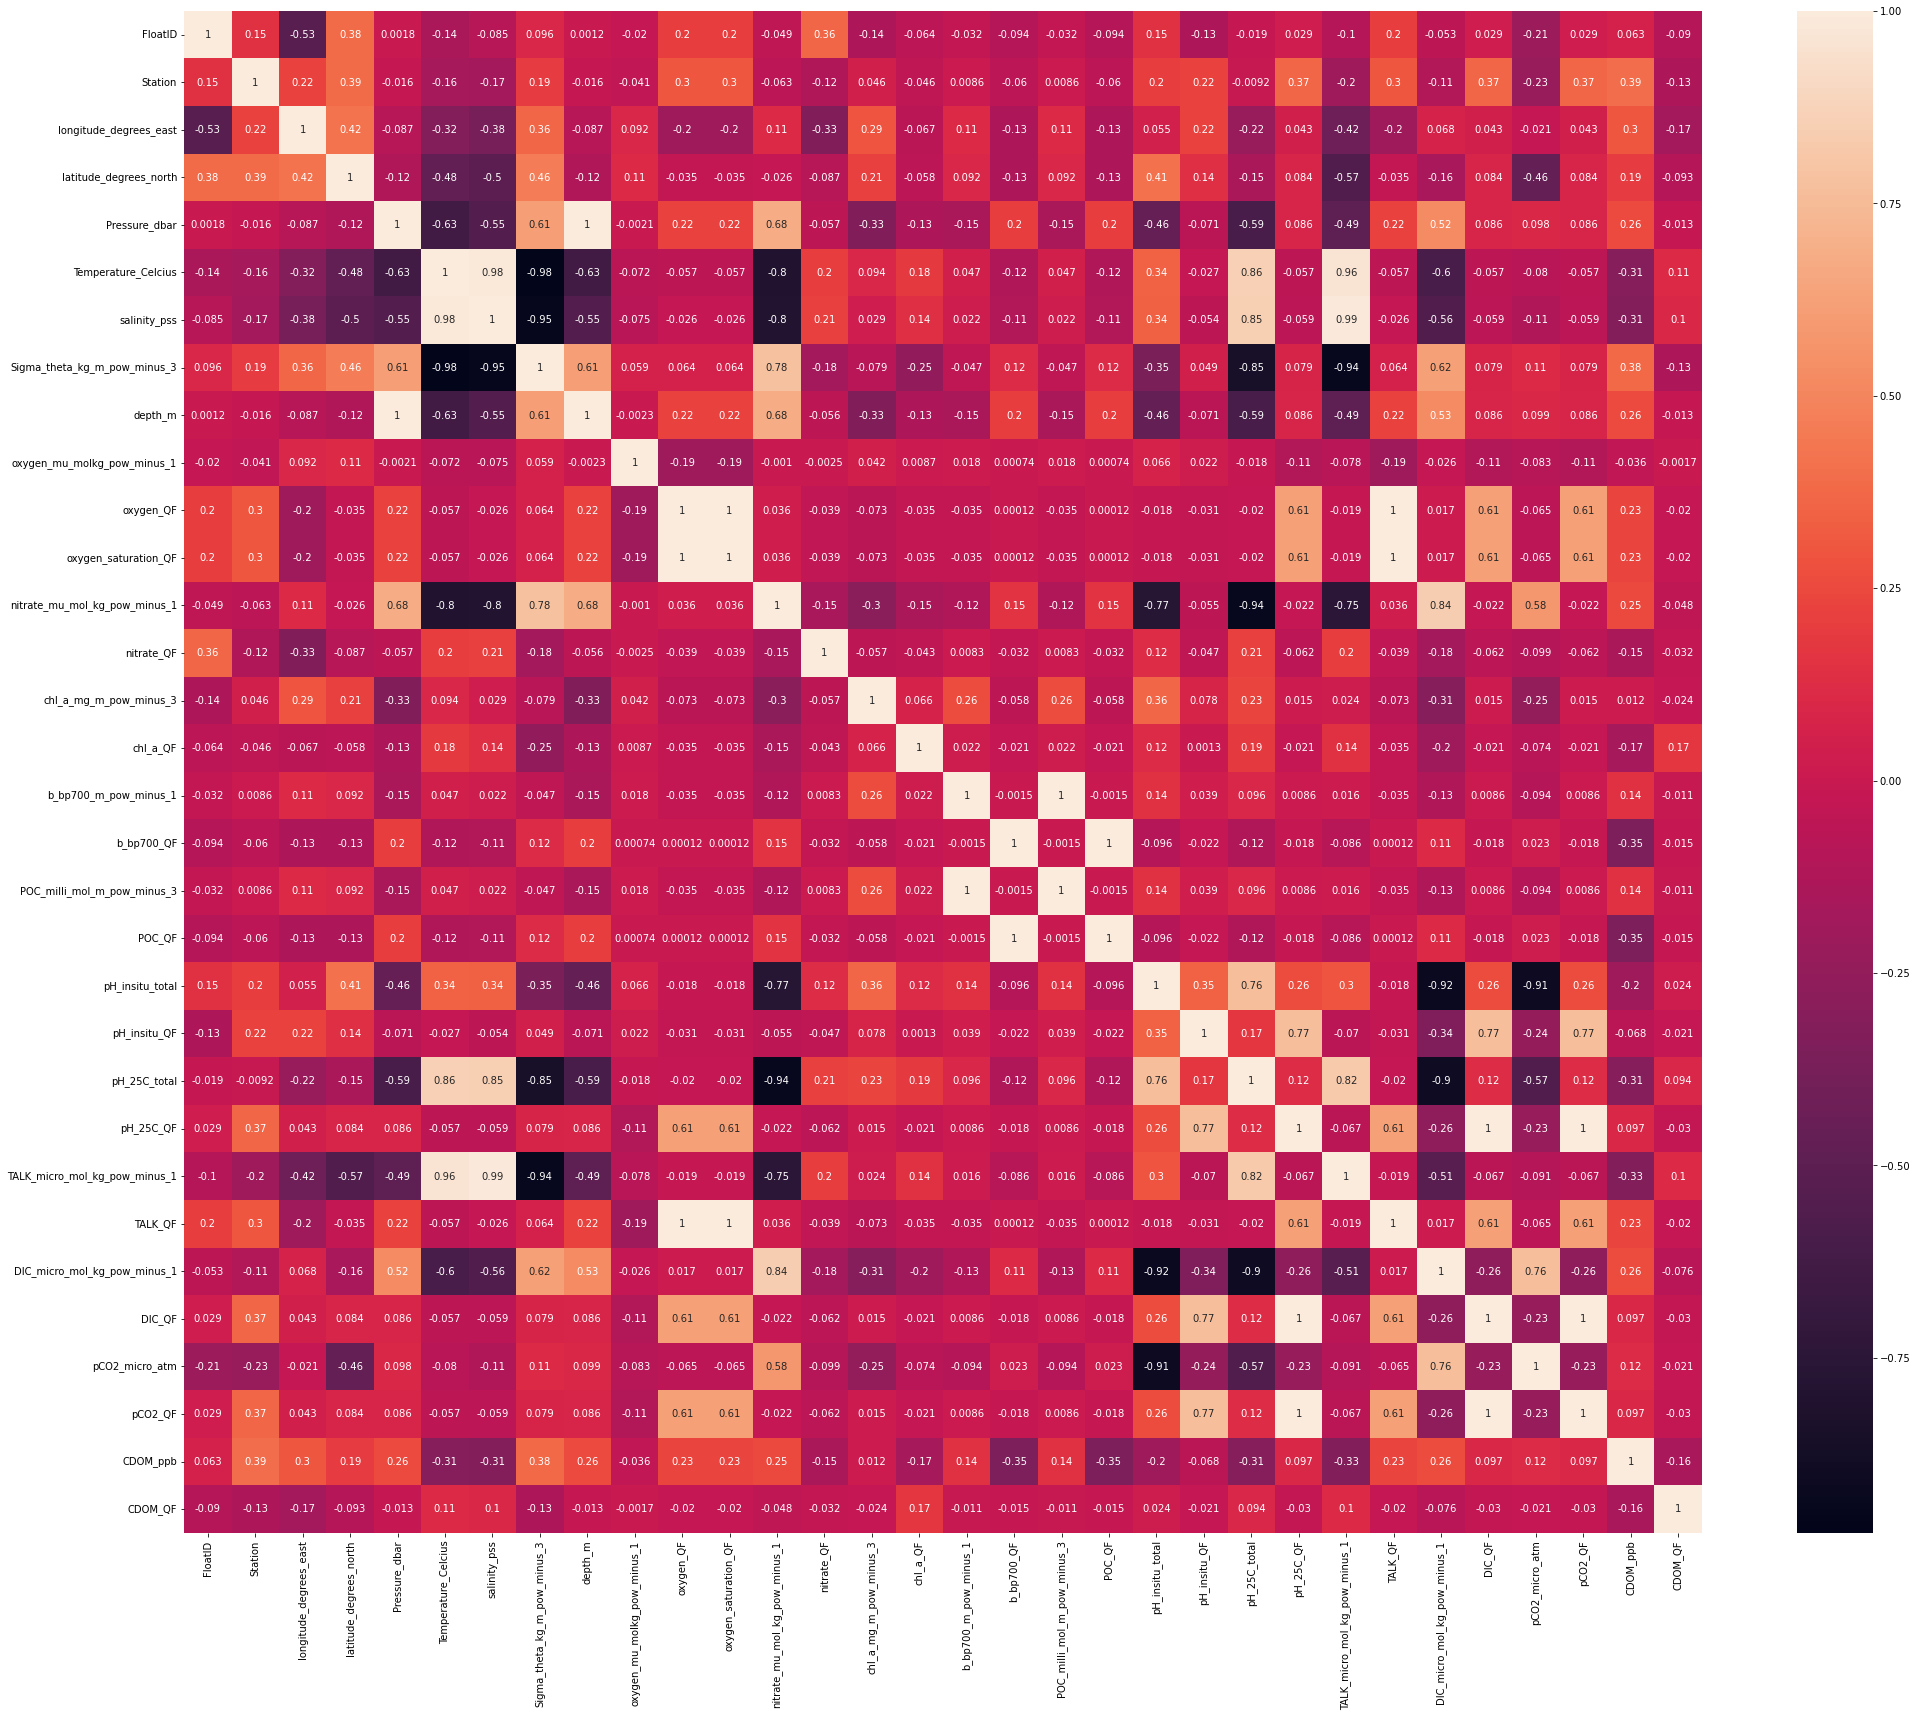

In [49]:
fig, ax = plt.subplots(figsize = (34, 28))
sns.heatmap(cor,annot=True)
plt.show()


In [50]:
# val.to_csv("final.csv",index=False)

In [56]:
# sum of all the correlation co efficient for all columns
# low correlation coefficient has been considered, please take it into account in future

cor_list=[]
cor_col=cor.columns
for i in cor_col:
    sm=0
    for j in cor[i]:
        sm+=abs(j)
    #print("abs value for ",i," is ",sm)
    cor_list.append((i,sm))
cor_list.sort(key=lambda i:i[1], reverse= True)
print(cor_list)
print(len(cor_list))

[('pH_25C_total', 11.222850352545423), ('DIC_micro_mol_kg_pow_minus_1', 10.858200245353922), ('Sigma_theta_kg_m_pow_minus_3', 10.808074177968939), ('Temperature_Celcius', 10.630142200970534), ('nitrate_mu_mol_kg_pow_minus_1', 10.51525915796225), ('salinity_pss', 10.236168532862973), ('TALK_micro_mol_kg_pow_minus_1', 10.036859507521326), ('pH_insitu_total', 9.985886457808421), ('depth_m', 9.352707798939228), ('Pressure_dbar', 9.346970293047299), ('pH_25C_QF', 7.849471324774508), ('DIC_QF', 7.849471324774508), ('pCO2_QF', 7.849471324774508), ('CDOM_ppb', 7.484358194251976), ('pCO2_micro_atm', 7.3323642199185715), ('latitude_degrees_north', 7.316193510069355), ('oxygen_QF', 7.046171730694423), ('oxygen_saturation_QF', 7.046171730694423), ('TALK_QF', 7.046171730694423), ('longitude_degrees_east', 6.978093917129925), ('Station', 6.2500519977801074), ('pH_insitu_QF', 5.962584847094609), ('chl_a_mg_m_pow_minus_3', 5.194295928869877), ('FloatID', 4.768302308187256), ('b_bp700_QF', 4.3041701273

In [59]:
# printing the total correlation coefficient for all columns in descendingly sorted order

# for i in cor_list:
#     print(i)

In [40]:
# train test split (70%-30%)
train,test = train_test_split(val,
                          random_state=14,
                          test_size=0.01,
                        train_size=0.5)

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)

In [41]:
# taking into account only those columns which are having total correlation coefficient >=9.5

# for i in cor_list:
#     if(i[1]>=9.5):
#         print(i)
#     else:
#         break

In [42]:
# checking the range of top columns

# for i in cor_list:
#     if(i[1]>=9.5):
#         print("range of ",i[0]," is: ",val[i[0]].unique().min(),"-",val[i[0]].unique().max())
#     else:
#         break

In [43]:
# nitrate_list=val['nitrate_mu_mol_kg_pow_minus_1'].value_counts().sort_index()
# for i in nitrate_list.iteritems():
#     print(i)

In [44]:
## the following is being used to predict pH_25C_total column

In [45]:
# x_train1[:,0].max()
#  check the max and the min value for all the columns of test and train data


In [104]:
def gaussianKernel(U,V,sigma):
        return np.exp((-1/(2*(sigma*sigma)))*(np.sum(np.power((U-V),2))))
def gram(U,V,sigma=0.1):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = gaussianKernel(U[i],V[j],sigma)
    return G


RBF_regressor=SVR(kernel = "precomputed")
y_train1=y_train1.ravel()
RBF_regressor.fit(gram(x_train1,x_train1,0.2),y_train1)
y_pred=RBF_regressor.predict(gram(x_test1,x_train1))
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)


# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 0.020038631032365757
RMSE: 0.1415578716722096
r2 value:  0.009607516421497486
adjusted r2 value:  -0.03762658664147733


In [130]:
def Kernel(U,V,sigma):
    return np.dot(U,V)
def Lineargram(U,V,sigma=0.1):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel(U[i],V[j],sigma)
    return G


Linear_regressor=SVR(kernel = "precomputed")
y_train1=y_train1.ravel()
Linear_regressor.fit(Lineargram(x_train1,x_train1),y_train1)
y_pred=Linear_regressor.predict(Lineargram(x_test1,x_train1))
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)


# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 0.00023745663745786632
RMSE: 0.015409628076558704
r2 value:  0.9882639054267605
adjusted r2 value:  0.9877041839932675


In [142]:
# custom kernel


# def gaussianKernel(U,V,sigma):
#         return np.exp((-1/(2*(sigma*sigma)))*(np.sum(np.power((U-V),2))))

In [143]:
# def gram(U,V,x_shape,y_shape,sigma=0.1):
#     G = np.zeros((U.shape[0], V.shape[0]))
#     for i in range(0,U.shape[0]):
#         for j in range(0,V.shape[0]):
#             G[i][j] = gaussianKernel(U[i],V[j],sigma)
#     return G

In [151]:
# def gram_mat(x,y):
#     if __name__ == '__main__':        
#         p=list()
#         run=math.ceil(x_train1.shape[0]/100)
#         adv=0
# # cnt=0
#         for i in range(run):
#             adv=adv+100
#             if(i==run-1):
#                 print(x_train1[adv-100:].shape)
#                 p[i]=mp.Process(target=gram,args=(x[adv-100:],y[adv-100:],x[adv-100:].shape[0],
#                                                  y[adv-100:].shape[0]))
#         #something
#         #print(x_train1[adv-100:].shape)
#         #cnt=cnt+x_train1[adv-100:].shape[0]
#             else:
#                 print(x_train1[adv-100:adv].shape)
#                 p[i]=mp.Process(target=gram,args=(x[adv-100:adv],y[adv-100:adv],100,100,))
                
#         #print(x_train1[adv-100:adv].shape)
#         #cnt=cnt+x_train1[adv-100:adv].shape[0]
#         #something
    
        

In [50]:
# regressor=SVR(kernel = "precomputed")
# y_train1=y_train1.ravel()
# regressor.fit(gram_mat(x_train1,x_train1),y_train1)
# y_pred=regressor.predict(gram_mat(x_test1,x_train1))
# y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
# y_pred=sc_y.inverse_transform(y_pred)


# # evaluating the model
# # mse
# print("MSE:", mean_squared_error(y_test, y_pred))
# # RMSE
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# # r2 score
# r2 = r2_score(y_test,y_pred)
# print("r2 value: ",r2)
# # adjusted r2 score
# n=y_test.shape[0]
# k=x_train.shape[1]
# adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
# print("adjusted r2 value: ",adj_r2_score)

In [41]:
# linear kernel based SVR called, and the model fitted to the training data

regressor=SVR(kernel='linear')
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)


# predicting based on test data


# prediction function
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)


# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 9.310903626645065e-05
RMSE: 0.009649302372008593
r2 value:  0.9951698469086216
adjusted r2 value:  0.9937438017102147


NameError: name 'DecisionBoundaryDisplay' is not defined

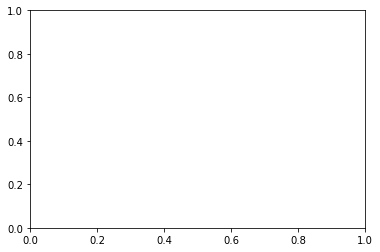

In [42]:
ax=plt.gca()
DecisionBoundaryDisplay.from_estimator(
    regressor,
    x_train1,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

plt.scatter(x_train1[:, 0], x_train1[:, 1], c=y_train1, cmap=plt.cm.Paired, edgecolors="k")
plt.title("3-Class classification using Support Vector Machine with custom kernel")
plt.axis("tight")
plt.show()

In [ ]:
# array([-0.46979538, -1.0286095 , -1.26924339, -0.98504837,  1.23284013,
#        -1.45351604, -0.97621531,  0.94200137,  1.23678584,  0.08450087,
#        -0.15097299, -0.15097299,  2.62340842, -0.16441089, -0.90213057,
#         0.65485102, -0.90213057,  0.62359817, -0.90213057,  0.62359817,
#        -0.91264494, -0.25155301, -0.18644171, -0.9384215 , -0.03516375,
#        -0.81259701, -0.18644171, -0.65960406,  0.225039  , -0.7713921 ,
#        -0.06891286])



# [-0.46889774 -0.53418161  1.28566971  1.49454323  0.6050651  -0.53664558
#   0.06344075  0.83834947  0.60503647  0.08448677 -0.15094693 -0.15094693
#  -0.06152355 -0.1643824   1.10807019 -0.97070554  1.10807019 -0.86454145
#   1.10807019 -0.86454145  1.09530957  2.4833385   3.28645623  1.06523529
#  -0.77364305  1.23010025  3.28645623 -0.65944433  0.2249991   1.29577139
#  -0.06890118]

In [56]:

print("actual value: ",y_test.iloc[100].values[0])

exm=x_test.iloc[100]
# print(type(exm))
# print(exm.shape)
# print(exm)
test=x_test.append(exm)

## getting a row from x_test
# test=sc_x.fit_transform(test)
# print(test)
# print(x_test.iloc[0].values.reshape(1,-1))
# test=test.to_frame()
## transform into dataframe
# print(test.shape)
# print(type(test))
test=sc_x.fit_transform(test)
# print(test[2962])

# # print(test.shape)
# test=test.transpose()
y_pred=regressor.predict(test)
# print(y_pred)

y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
print("predicted value: ",y_pred[-1][0])

actual value:  7.7104
predicted value:  7.717022494477499


C:\Users\asifs\AppData\Local\Temp\ipykernel_7828\2406922231.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test=x_test.append(exm)


[-0.03693581]


[[-2.98312099e+19]]


In [56]:
## the following section is for poly kernel




In [57]:
# degree 2 is better, and by default is 3

for i in [2,3,4]:
    
    print("degree is: ",i)
    regressor=SVR(kernel='poly',degree=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

degree is:  2
MSE: 0.0009909741268145653
RMSE: 0.03147974153030112
r2 value:  0.9492080323738551
adjusted r2 value:  0.9488200207926795
degree is:  3
MSE: 0.002485824909117571
RMSE: 0.04985804758629815
r2 value:  0.8725900758741095
adjusted r2 value:  0.8716167620131183
degree is:  4
MSE: 0.07688579912993057
RMSE: 0.27728288647143473
r2 value:  -2.9407497276147034
adjusted r2 value:  -2.9708540256817453


In [58]:
# lesser coef0 is better, and 0.4 is good!!!!

for i in [0.3,0.4]:
    
    print("coef0 is: ",i)
    regressor=SVR(kernel='poly',coef0=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

coef0 is:  0.3
MSE: 6.841937259772882e-05
RMSE: 0.008271600364967399
r2 value:  0.9964931934508162
adjusted r2 value:  0.9964664041449944
coef0 is:  0.4
MSE: 6.736666676963475e-05
RMSE: 0.008207719949513064
r2 value:  0.9965471494511734
adjusted r2 value:  0.9965207723277102


In [59]:
regressor=SVR(kernel='poly',degree=2,coef0=0.4)
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
# mse
print("MSE:", mean_squared_error(y_test, y_pred))

# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)


# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 7.992369363424844e-05
RMSE: 0.008940005236813256
r2 value:  0.9959035442502604
adjusted r2 value:  0.9958722504778992


In [60]:
## the following section is for rbf

In [61]:
## better prediction for C=4



for i in [1,3,4,5]:
    print("C is: ",i)
    regressor=SVR(C=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

C is:  1
MSE: 9.335307091425874e-05
RMSE: 0.009661939293654186
r2 value:  0.9952152270908224
adjusted r2 value:  0.9951786751045769
C is:  3
MSE: 9.305489670737275e-05
RMSE: 0.0096464966027762
r2 value:  0.9952305098860572
adjusted r2 value:  0.9951940746486171
C is:  4
MSE: 9.290203457897008e-05
RMSE: 0.009638570152204635
r2 value:  0.9952383447710124
adjusted r2 value:  0.9952019693860694
C is:  5
MSE: 9.290203457897008e-05
RMSE: 0.009638570152204635
r2 value:  0.9952383447710124
adjusted r2 value:  0.9952019693860694


In [62]:
## epsilon = 0.001 produces better result
for i in [0.001,0.0009,0.0005,0.002]:    
    print("epsilon is: ",i)
    regressor=SVR(epsilon=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

epsilon is:  0.001
MSE: 4.3705855085779604e-05
RMSE: 0.0066110403935976374
r2 value:  0.9977598745350439
adjusted r2 value:  0.9977427616988158
epsilon is:  0.0009
MSE: 4.373121961102042e-05
RMSE: 0.006612958461310673
r2 value:  0.9977585744868287
adjusted r2 value:  0.9977414517192318
epsilon is:  0.0005
MSE: 4.403015029596738e-05
RMSE: 0.006635521855586596
r2 value:  0.9977432529186249
adjusted r2 value:  0.9977260131060269
epsilon is:  0.002
MSE: 4.357399079160259e-05
RMSE: 0.006601059823361896
r2 value:  0.9977666331847197
adjusted r2 value:  0.9977495719793787


In [128]:
## final 
regressor=SVR(epsilon=0.001, C=4)
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)

# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 0.000445837284032074
RMSE: 0.021114859318311217
r2 value:  0.977964867246109
adjusted r2 value:  0.9769139609147696


In [ ]:
# linear kernel (X.XT) * C

def linear_weight_kernel(x,y):
    print("shape of x: ",x.shape,"shape of y: ",y.shape)
    print("for x: ",x[0])
    print("for y: ",y[0])
    return (np.dot(x,y.T)*0.05)


y_train1=y_train1.ravel()
linear_weight_regressor=SVR(kernel=linear_weight_kernel)
test=linear_weight_regressor.fit(x_train1,y_train1)
y_pred=linear_weight_regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)

# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))

# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

In [115]:
# polynomial + linear

def poly_linear(x,y,deg=2):
#     print("shape of x: ",x.shape,"shape of y: ",y.shape)
#     print("for x: ",x[0])
#     print("for y: ",y[0])
    #return np.square(np.dot(x,y.T)+0.1)+np.dot(x,y.T)
    return np.power(np.dot(x,y.T),deg) + np.dot(x,y.T)


y_train1=y_train1.ravel()
Poly_regressor=SVR(kernel=poly_linear)
Poly_regressor.fit(x_train1,y_train1)
y_pred=Poly_regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
# evaluating the model

# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 0.00023794078033755758
RMSE: 0.015425329180849191
r2 value:  0.9882399770721614
adjusted r2 value:  0.9876791144402183


In [120]:
## taking one input for predicting, testing purpo

[-0.68804293]
[[7.74440569]]


[[7.8306453]]


In [46]:
## weight based on correlation values 

weight=cor['pH_25C_total'].drop("pH_25C_total")
mat=np.zeros((x_train1.shape[1],x_train1.shape[1]))
for i in range(mat.shape[0]):
    mat[i][i]=weight[i]

In [1]:
# print(mat)

In [70]:
weight_trans=weight.to_numpy().tolist()

In [88]:
## rbf with coefficient matrix multiplied in exponential power

def Kernel_matmul(U,V,sigma):
    return np.exp((-1/(2*(sigma*sigma)))*np.sum(np.power(np.matmul((U-V),mat),2)))
def RBF_gram(U,V,sigma=0.1):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_matmul(U[i],V[j],sigma)
    return G
RBF_matmul_regressor=SVR(kernel = "precomputed")
y_train1=y_train1.ravel()
RBF_matmul_regressor.fit(RBF_gram(x_train1,x_train1,0.2),y_train1)
y_pred=RBF_matmul_regressor.predict(RBF_gram(x_test1,x_train1))
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)


# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 0.017469447266332573
RMSE: 0.13217203662777
r2 value:  0.13658726302701063
adjusted r2 value:  0.09540911710983735


In [45]:
## sigmoid kernel with adding coefficient

def Kernel_tanh(U,V,sigma):
    return np.tanh(sigma*np.dot(U,V))
def tanh_kernel(U,V,sigma=0.1):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_tanh(U[i],V[j],sigma)
    return G

tanh_regressor=SVR(kernel = "precomputed")
y_train1=y_train1.ravel()
tanh_regressor.fit(tanh_kernel(x_train1,x_train1,0.2),y_train1)
y_pred=tanh_regressor.predict(tanh_kernel(x_test1,x_train1))
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)

# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
# def Kernel(U,V,sigma):
#     return np.tanh(np.dot(weight_trans,(U-V)))
# def tanh_kernel(U,V,sigma=0.1):
#     G = np.zeros((U.shape[0], V.shape[0]))
#     for i in range(0,U.shape[0]):
#         print(i)
#         for j in range(0,V.shape[0]):
#             G[i][j] = Kernel(U[i],V[j],sigma)
#     return G

# regressor=SVR(kernel = "precomputed")
# y_train1=y_train1.ravel()
# regressor.fit(tanh_kernel(x_train1,x_train1,0.2),y_train1)
# y_pred=regressor.predict(tanh_kernel(x_test1,x_train1))
# y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
# y_pred=sc_y.inverse_transform(y_pred)

# # evaluating the model
# # mse
# print("MSE:", mean_squared_error(y_test, y_pred))
# # RMSE
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# # r2 score
# r2 = r2_score(y_test,y_pred)
# print("r2 value: ",r2)
# # adjusted r2 score
# n=y_test.shape[0]
# k=x_train.shape[1]
# adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
# print("adjusted r2 value: ",adj_r2_score)

In [42]:
# train test split (70%-30%)
train,test = train_test_split(val,
                          random_state=29,
                          test_size=0.01,
                        train_size=0.08)

# training data
x_train=train.drop(['pH_25C_total'],axis=1)
y_train=train['pH_25C_total']
#test data
x_test=test.drop(['pH_25C_total'],axis=1)
y_test=test['pH_25C_total']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)

In [ ]:
# sinh kernel with sigma multiplied and C added afterwards
def Kernel_sinh(U,V,sigma,C):
    return np.sinh((sigma*np.dot(U,V))+C)
def sinh_kernel(U,V,sigma=0.1,C=0):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
#         print(i)
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_sinh(U[i],V[j],sigma,C)
    return G

sinh_regressor=SVR(kernel = "precomputed")
y_train1=y_train1.ravel()
sigma=float(input("paramter for sigma: "))
C=float(input("paramter for C: "))
sinh_regressor.fit(sinh_kernel(x_train1,x_train1,sigma,C),y_train1)
y_pred=sinh_regressor.predict(sinh_kernel(x_test1,x_train1,sigma,C))
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)

# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

paramter for sigma: 0.3
paramter for C: 0.1


In [ ]:
# 0.1 0
# MSE: 0.006597707266296386
# RMSE: 0.08122627202018068
    
# 0.2 0
# MSE: 5.5931388739574e+17
# RMSE: 747872908.5852355
    
# 0.01 0
# MSE: 0.00030922786430165604
# RMSE: 0.017584876010414634

# 0.001 0
# MSE: 0.000427508210633359
# RMSE: 0.02067627168116532

In [ ]:
## predicting with custom kernel made with gram matrix

y_pred=RBF_regressor.predict(gram(x_test1[500:501],x_train1))
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
print(y_pred)

In [ ]:
## predicting with custom kernel with external function defined


testing=np.transpose(x_test1[500])
testing=[testing]
y_pred=Poly_regressor.predict(testing)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
print(y_pred)